In [1]:
from matplotlib.gridspec import GridSpec
from netCDF4 import Dataset
import matplotlib
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import LogNorm
import matplotlib.lines as mlines
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import xarray as xr
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcols
import glob 
import colorcet as cc
import netCDF4
import cmaps
from scipy.interpolate import interp2d
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.gridspec as gridspec
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pyproj import Proj
# from wrf import getvar, interplevel, to_np, latlon_coords, get_cartopy, cartopy_xlim, cartopy_ylim
from colorspacious import cspace_converter
import pathlib
from pathlib import Path
import numpy.ma as ma
from numpy import genfromtxt
import pandas as pd
import calendar
from IPython.core.pylabtools import figsize
from scipy import stats
from collections import Counter
from scipy.stats import mannwhitneyu
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

/home/disk/orca/csmall3/anaconda3/envs/new_2025_env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Objective
Create the case study for the Non-MJO AR

In [2]:
#bring in the West Coast Boundary
WC_IMERG_mask = xr.open_dataset('/home/disk/orca/csmall3/AR_testing_research/state_masks/US_West_Coast_mask_IMERG.nc')
# WC_IMERG_mask['lat'] = WC_IMERG_mask['lat'][::-1]
mask_ary = WC_IMERG_mask['Mask']
WC_bound = mask_ary

In [3]:
mjo_act_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_MJO_Active_ARs_UPDATE.csv')
mjo_act_og = mjo_act_og.drop(columns=['Unnamed: 0'])

mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_MJO_Connected_ARs_UPDATE.csv')
mjo_og = mjo_og.drop(columns=['Unnamed: 0'])

non_mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_Non_MJO_ARs_UPDATE.csv')
non_mjo_og = non_mjo_og.drop(columns=['Unnamed: 0'])

#filter them by DJFM

dec=mjo_act_og[mjo_act_og['Month'] == 12]
jan=mjo_act_og[mjo_act_og['Month'] == 1]
feb=mjo_act_og[mjo_act_og['Month'] == 2]
mar=mjo_act_og[mjo_act_og['Month'] == 3]

mjo_act_djfm=pd.concat([dec, jan, feb, mar], ignore_index=True)


dec=mjo_og[mjo_og['Month'] == 12]
jan=mjo_og[mjo_og['Month'] == 1]
feb=mjo_og[mjo_og['Month'] == 2]
mar=mjo_og[mjo_og['Month'] == 3]

mjo_conn_djfm=pd.concat([dec, jan, feb, mar], ignore_index=True)

dec=non_mjo_og[non_mjo_og['Month'] == 12]
jan=non_mjo_og[non_mjo_og['Month'] == 1]
feb=non_mjo_og[non_mjo_og['Month'] == 2]
mar=non_mjo_og[non_mjo_og['Month'] == 3]

non_mjo_djfm=pd.concat([dec, jan, feb, mar], ignore_index=True)

mjo_act_djfm.sort_values(by='Max ERM', ascending=False, inplace=True, ignore_index=True)
mjo_conn_djfm.sort_values(by='Max ERM', ascending=False, inplace=True, ignore_index=True)
non_mjo_djfm.sort_values(by='Max ERM', ascending=False, inplace=True, ignore_index=True)

## Non-MJO ERM West Coast Map Example

In [5]:
non_mjo_djfm

,AR ID (string),Landfall Datetime,Max ERM,Max IVT,End Season Year,Month,AR ID (Number)
0,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2024-03-29T17:00:00,2.657752,1840.54500,2023,3,511.01
1,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2009-02-08T19:00:00,2.488095,982.22340,2008,2,488.40
2,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2019-02-24T21:00:00,2.214593,848.53320,2018,2,469.10
3,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2011-01-14T15:00:00,1.941443,1956.18690,2010,1,371.10
4,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2017-03-13T08:00:00,1.857517,1056.46010,2016,3,549.03
5,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2012-12-16T03:00:00,1.833578,1464.60700,2012,12,414.10
6,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2001-01-10T16:00:00,1.631099,730.10815,2000,1,459.00
7,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2021-03-14T10:00:00,1.548273,952.24270,2020,3,478.30
8,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2017-02-27T10:00:00,1.487009,568.29333,2016,2,535.10
9,/home/orca/bkerns/projects/mjo_lpt_and_ar/trac...,2023-03-28T00:00:00,1.384326,666.71470,2022,3,558.10


In [11]:
#need the date of max ERM

## need to find date of max ERM 3 day for each system!
# let's do it for non active first
max_ar_erm = []
AR_ID = []
AR_date = []
# erm_mask_fin = []
erm_masks = []
max_erm_day = []
max_erm_year = []

for i in range(0,1):
    times = np.array(non_mjo_djfm['Landfall Datetime'].iloc[i])
    times=np.array2string(times)
    str_times = times.replace("'", "")
    fin_time = datetime.strptime(str_times.split(".")[0], '%Y-%m-%dT%H:%M:%S')#this gives you the datetime of first landfall
    fin_year = fin_time.year 

    if fin_year < 2001: #no erm data before 2001
        print('out of date range')
    else:
        ary_test = xr.open_dataset(non_mjo_djfm['AR ID (string)'].iloc[i]) #open up the first AR system
        time_index = np.where(ary_test['time'] == np.datetime64(fin_time))[0][0]

        year_oi = []
        days_of_oi = []

        for iiii in range(-24,(len(ary_test['time']) - time_index)): #the solution is to read this into a df and then drop the duplicates!
            #-24 to give me the day before
            new_times = np.array2string(ary_test['time'][time_index + iiii].values)
            str_new_times = new_times.replace("'", "")
            fin_new_time = datetime.strptime(str_new_times.split(".")[0], '%Y-%m-%dT%H:%M:%S') #this gies you datetime of the subsequent time after landfall
            new_year = fin_new_time.year
            year_oi += [new_year]
            day_of_year = fin_new_time.timetuple().tm_yday
            days_of_oi += [day_of_year]

        hold_erm_dates_df = pd.DataFrame({'Year':year_oi, 
                            'Day of Year':days_of_oi})
        
        hold_erm_dates_df = hold_erm_dates_df.drop_duplicates().reset_index(drop=True)

        #create loop to read in the ERM data
        max_erm = []
        # erm_masks = []

        for yyyy in range(0,len(hold_erm_dates_df)):

            erm_test = xr.open_dataset('/home/orca/bkerns/projects/doe_coastal/extreme_rain/global_gridded_erm/data/processed/daily_precip_and_erm.3days.imerg_v7_2006_2020.'+str(hold_erm_dates_df['Year'].iloc[yyyy])+'.nc')
            erm_ary=erm_test['erm'][hold_erm_dates_df['Day of Year'].iloc[yyyy]-1] #minus 1 to deal with the indexing problems
            a,b=xr.align(erm_ary, mask_ary) #this works to fix the alignment problem!

            test_plt=a.where(b,0)#this works to mask perfectlY!

            #get the max erm
            erm_masks += [test_plt] #this gets a list of all the ERM masks when the ARs are over land

            max_erm += [test_plt.max().values] #this gives the spatial max, not for the whole systems
            max_erm_day += [hold_erm_dates_df['Day of Year'].iloc[yyyy]] #need the day of year
            max_erm_year += [hold_erm_dates_df['Year'].iloc[yyyy]]

        
        max_erm = np.array(max_erm)
        max_ar_erm += [max_erm.max()] #this the max for the whole duration of the system
        AR_ID += [non_mjo_djfm['AR ID (string)'].iloc[i]]
        AR_date += [non_mjo_djfm['Landfall Datetime'].iloc[i]]


In [12]:
date_max_erm_df = pd.DataFrame({'Max ERM':max_erm, 
                               'Day of Year':max_erm_day,
                               'Year':max_erm_year})
#pull the max data out of this df
idx = date_max_erm_df['Max ERM'].idxmax()
dt_max_day = date_max_erm_df['Day of Year'].iloc[idx]
dt_max_year = date_max_erm_df['Year'].iloc[idx]


In [15]:
dt_print_max_erm=dt.datetime(dt_max_year, 1, 1) + dt.timedelta(int(dt_max_day) - 1)

In [21]:
erm_test

<xarray.Dataset>
Dimensions:    (dayofyear: 366, lat: 1800, lon: 3600)
Coordinates:
  * dayofyear  (dayofyear) int16 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
  * lon        (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.8 179.9
  * lat        (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
Data variables:
    erm        (dayofyear, lat, lon) float64 ...
    precip     (dayofyear, lat, lon) float64 ...
    erm_ref    (lat, lon) float32 ...

In [17]:
#set up ERM plot data
erm_test = xr.open_dataset('/home/orca/bkerns/projects/doe_coastal/extreme_rain/global_gridded_erm/data/processed/daily_precip_and_erm.3days.imerg_v7_2006_2020.'+str(dt_max_year)+'.nc')
erm_ary=erm_test['erm'][int(dt_max_day)-1] #minus 1 to deal with the indexing problems
a,b=xr.align(erm_ary, mask_ary) #this works to fix the alignment problem!

erm_plt=a.where(b,0)#this works to mask perfectlY!

<ipython-input-34-baaa55c0d61b>:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


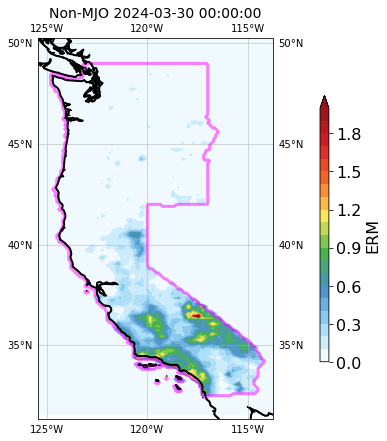

In [34]:
#try plotting
#quick plot median
#get better colorbar!!
plot_data = erm_plt
lon_ary = erm_plt['lon']
# lat_ary = IMERG_mask['lat'][::-1]# this works lol
lat_ary = erm_plt['lat']# this works lol


# colormap=cmaps.MPL_jet
# colormap=cmaps.prcp_1
colormap=cmaps.WhiteBlueGreenYellowRed
fig = plt.figure(figsize=[14, 7])
political_boundaries = NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', scale='50m', facecolor='none')
states = NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')
levels = np.linspace(0.0, 2.0, 21)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title('Non-MJO '+str(dt_print_max_erm)+'', fontsize=14)					   
ax.add_feature(cartopy.feature.LAND, edgecolor='k', facecolor='none', zorder=10)
ax.coastlines('50m', linewidth=2, zorder=5)
# ax.set_extent([50, 180, -30, 30], crs=ccrs.PlateCarree())#set west coast in a second
# css = ax.pcolormesh(lon_ary, lat_ary, plot_data, cmap = colormap, transform=ccrs.PlateCarree(),zorder=1, vmin=0, vmax=5) #shut of min/max
css = ax.contourf(lon_ary, lat_ary, plot_data, cmap = colormap, transform=ccrs.PlateCarree(),zorder=1, vmin=0, vmax=2, levels=levels, extend='max') #shut of min/max
ax.contour(np.array(WC_bound['lon']), np.array(WC_bound['lat']), WC_bound.T, [0.5], colors=('magenta',),alpha=0.5, transform=ccrs.PlateCarree(),zorder=5, vmin=0,linewidths=3)
# ax.scatter(240.3, 34.416667, c='r', marker='x', s=100)
#css = ax.pcolormesh(lon_ary, lat_ary, plot_data, cmap = cmaps.precip2_17lev, transform=ccrs.PlateCarree(),zorder=1, vmin=7)
#cbar = plt.colorbar(css, ax=ax, extend='both', shrink=0.75)
#cbar = plt.colorbar(css, ax=ax,orientation='horizontal',extend='min',aspect=30, shrink=0.7, pad=0.06)
cbar = plt.colorbar(css, ax=ax,orientation='vertical',aspect=30, shrink=0.7, pad=0.06)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('ERM', fontsize =16)

#ax.text(20,-135,'Source= IMERG, Units=$mm$ $day^{-1}$', fontsize = 12, color = 'k')
# ax.set_xlim([45, 70])
# ax.set_ylim([30, 55])

#try adding gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5)
gl.ypadding = 5
gl.xpadding = 5
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,5)[::1])
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,5)[::1])	
# fig.text(0.50, 0.02, 'This composite constitutes 117 AR systems at hourly resolution from May 1 through April 30, 1998-2022',
#          horizontalalignment='center', wrap=True)	
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/Non-MJO_ERM_Case_Max_ERM.png", dpi=350, bbox_inches='tight') 

fig.savefig("/home/disk/orca/csmall3/public_html/research/ARs/Overall_analysis/5_degrees/2024_06_18_Paper_Images/Fig_5_Non_Act_ERM.png", dpi=350, bbox_inches='tight') 
fig.show()

In [23]:
#set up precip plot data
prc_ary=erm_test['precip'][int(dt_max_day)-1] #minus 1 to deal with the indexing problems
a,b=xr.align(prc_ary, mask_ary) #this works to fix the alignment problem!

prc_plt=a.where(b,0)#this works to mask perfectlY!

In [25]:
plot_data.max()

<xarray.DataArray 'precip' ()>
array(4.02499965)
Coordinates:
    dayofyear  int16 90

<ipython-input-26-01387ef14ead>:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


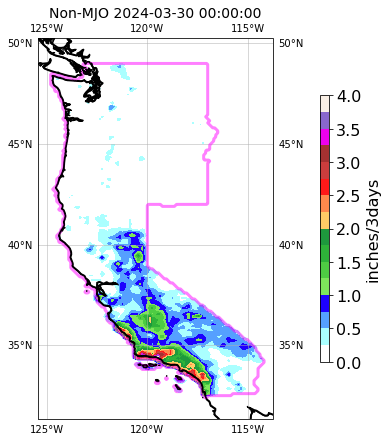

In [26]:
#try plotting
#quick plot median
#get better colorbar!!
plot_data = prc_plt/ 25.4
lon_ary = prc_plt['lon']
# lat_ary = IMERG_mask['lat'][::-1]# this works lol
lat_ary = prc_plt['lat']# this works lol


# colormap=cmaps.MPL_jet
colormap=cmaps.prcp_1
# colormap=cmaps.WhiteBlueGreenYellowRed
fig = plt.figure(figsize=[14, 7])
political_boundaries = NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', scale='50m', facecolor='none')
states = NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')
levels = np.linspace(0.0, 4.0, 17)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title('Non-MJO '+str(dt_print_max_erm)+'', fontsize=14)					   
ax.add_feature(cartopy.feature.LAND, edgecolor='k', facecolor='none', zorder=10)
ax.coastlines('50m', linewidth=2, zorder=5)
# ax.set_extent([50, 180, -30, 30], crs=ccrs.PlateCarree())#set west coast in a second
# css = ax.pcolormesh(lon_ary, lat_ary, plot_data, cmap = colormap, transform=ccrs.PlateCarree(),zorder=1, vmin=0, vmax=5) #shut of min/max
css = ax.contourf(lon_ary, lat_ary, plot_data, cmap = colormap, transform=ccrs.PlateCarree(),zorder=1, vmin=0, vmax=4, levels=levels) #shut of min/max
ax.contour(np.array(WC_bound['lon']), np.array(WC_bound['lat']), WC_bound.T, [0.5], colors=('magenta',),alpha=0.5, transform=ccrs.PlateCarree(),zorder=5, vmin=0,linewidths=3)
# ax.scatter(240.3, 34.416667, c='r', marker='x', s=100)
#css = ax.pcolormesh(lon_ary, lat_ary, plot_data, cmap = cmaps.precip2_17lev, transform=ccrs.PlateCarree(),zorder=1, vmin=7)
#cbar = plt.colorbar(css, ax=ax, extend='both', shrink=0.75)
#cbar = plt.colorbar(css, ax=ax,orientation='horizontal',extend='min',aspect=30, shrink=0.7, pad=0.06)
cbar = plt.colorbar(css, ax=ax,orientation='vertical',aspect=30, shrink=0.7, pad=0.06)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('inches/3days', fontsize =16)

#ax.text(20,-135,'Source= IMERG, Units=$mm$ $day^{-1}$', fontsize = 12, color = 'k')
# ax.set_xlim([45, 70])
# ax.set_ylim([30, 55])

#try adding gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5)
gl.ypadding = 5
gl.xpadding = 5
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,5)[::1])
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,5)[::1])	
# fig.text(0.50, 0.02, 'This composite constitutes 117 AR systems at hourly resolution from May 1 through April 30, 1998-2022',
#          horizontalalignment='center', wrap=True)	
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/Non-MJO_ERM_Case_Max_Precip.png", dpi=350, bbox_inches='tight') 
fig.show()